# Visualizing Outer Branches of the Distribution

## General

### Imports

In [1]:
import pyvdirs.dirs as dirs
import sys
import os
sys.path.insert(0, dirs.SYSTEM_HOME)
sys.path.insert(0, os.path.join(dirs.SYSTEM_HOME, "ToyExample"))

import copy
import pickle
import builtins
import numpy as np
import torch
import matplotlib.pyplot as plt
import pyvtools.text as vtext

import ToyExample.dnnlib.util as dnnlib
from ToyExample.torch_utils import persistence
import ToyExample.training.phema as phema

import ToyExample.toy_example as toy

%load_ext autoreload
%autoreload 2

### Parameters

In [2]:
# Network parameters
classes='A'
num_layers=4
hidden_dim=64
batch_size=4<<10
total_iter=4<<10

# Distribution parameters
P_mean=-2.3
P_std=1.5
sigma_data=0.5
sigma_max=5
lr_ref=1e-2
lr_iter=512
ema_std=0.010

# Guidance parameters
guidance=False
guidance_weight=3
guide_path=os.path.join(dirs.MODELS_HOME, "ToyExample", "10_EarlyStopACID_Ref_iter0512.pkl")
guide_interpolation=False

# ACID parameters
acid=False
acid_n=16
acid_f=0.8
acid_diff=True
acid_inverted=False

# Training parameters
val_batch_size=4<<7
test_batch_size=4<<8

# Other parameters
device=torch.device('cuda')
fig1_kwargs = dict(view_x=0.30, view_y=0.30, view_size=1.2, device=device)
fig2_kwargs = dict(view_x=0.45, view_y=1.22, view_size=0.3, device=device)#, sample_distance=0.045, sigma_max=0.03)
seed=0

In [3]:
# Set random seed, if specified
if seed is not None:
    print("Seed = ", seed)
    torch.manual_seed(seed)
    generator = torch.Generator(device).manual_seed(seed)
    np.random.seed(seed)

Seed =  0


In [5]:
# Initialize models
net = toy.ToyModel(num_layers=num_layers, hidden_dim=hidden_dim, sigma_data=sigma_data).to(device).train().requires_grad_(True)
ema = copy.deepcopy(net).eval().requires_grad_(False)
opt = torch.optim.Adam(net.parameters(), betas=(0.9, 0.99))
if guide_path is not None:
    with builtins.open(guide_path, "rb") as f:
        guide = pickle.load(f).to(device)
    print("Guide model loaded")
else:
    guide = None
if guidance and acid:
    ref = guide
    print("Guide model assigned as ACID reference")
elif acid: 
    ref = ema
    print("EMA assigned as ACID reference")
else: ref = None

Guide model loaded from /home/valeria/Code/SCID/models/ToyExample/10_EarlyStopACID_Ref_iter0512.pkl


## Plots

### Original plots

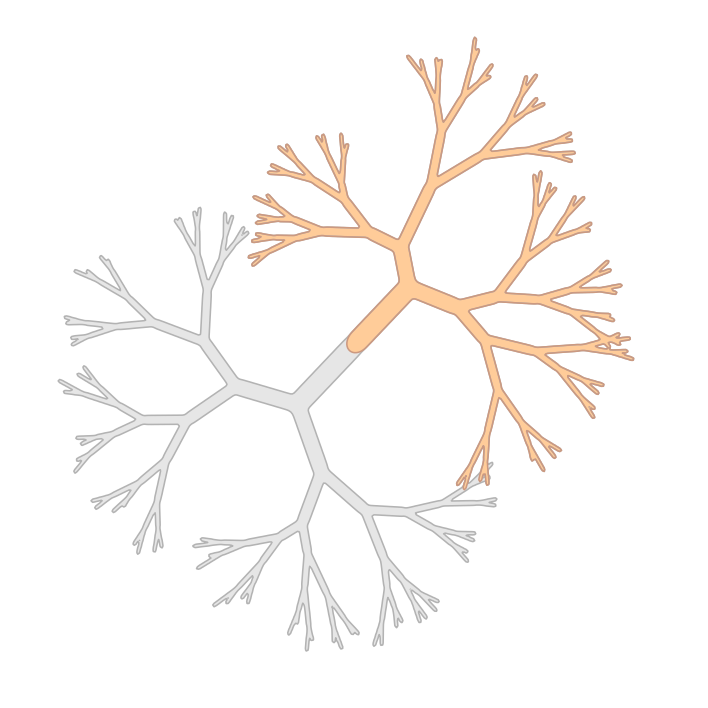

In [10]:
plt.figure(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'gt_uncond', 'gt_outline'}, device=device)

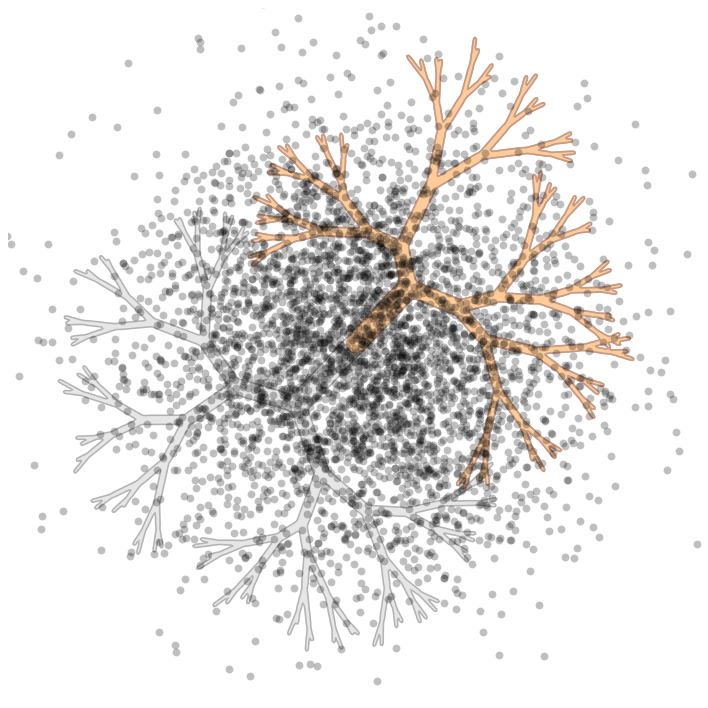

In [11]:
plt.figure(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'samples','gt_uncond', 'gt_outline'}, 
            sigma_max=sigma_max, device=device, num_samples=1<<12)

Text(0.5, 1.0, 'Sigma max = 0.5')

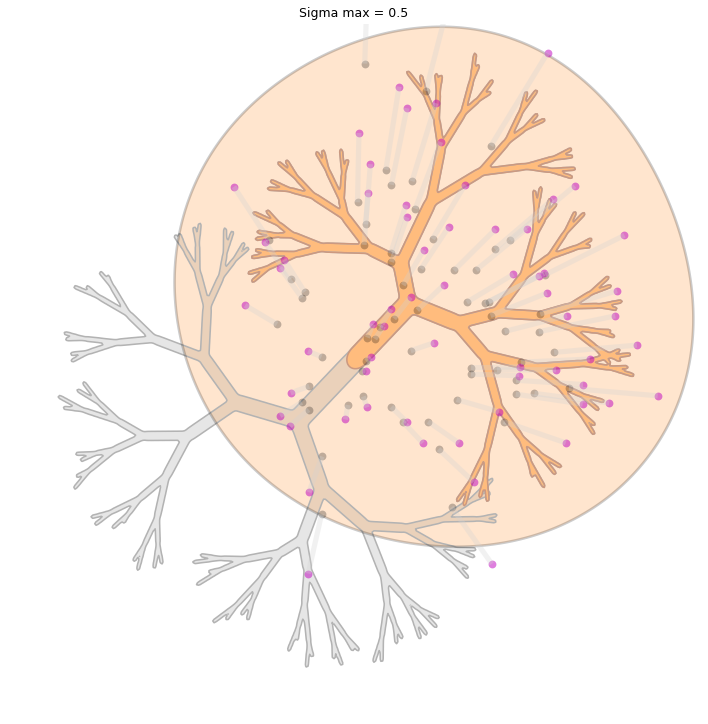

In [13]:
sigma_max = 0.5
plt.figure(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'samples_before_small',
                        'trajectories_small', 'samples',
                        'gt_smax',
                        'gt_uncond', 'gt_outline'}, num_samples=1<<6, sigma_max=sigma_max)
plt.title(f"Sigma max = {sigma_max:.1f}")

### Outer distribution plots

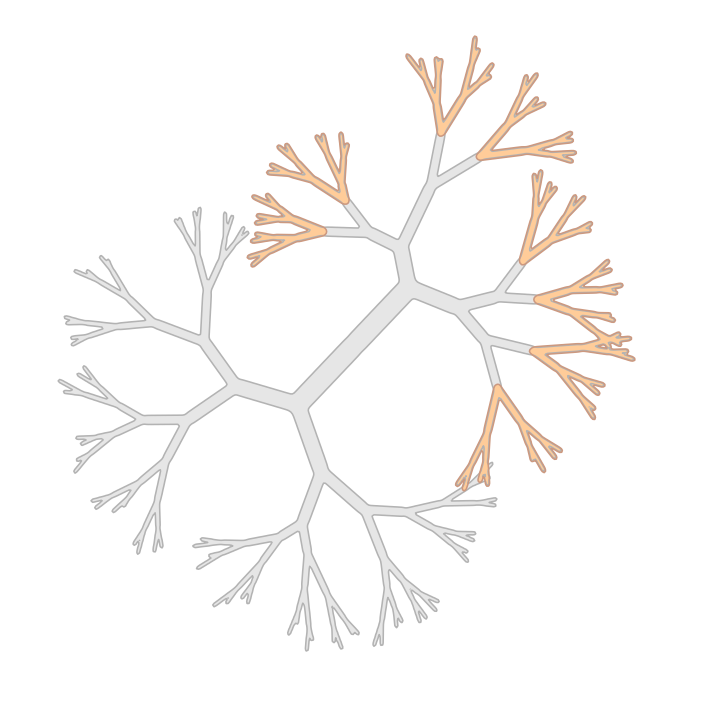

In [25]:
plt.figure(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'gt_uncond', 'out_gt_outline'}, device=device, depth_sep=4)

In [23]:
# plt.figure(figsize=[12, 12], dpi=75)
# toy.do_plot(ema, elems={'samples','gt_uncond', 'gt_outline'}, 
#             sigma_max=sigma_max, device=device, num_samples=1<<12)

In [24]:
# sigma_max = 0.5
# plt.figure(figsize=[12, 12], dpi=75)
# toy.do_plot(ema, elems={'samples_before_small',
#                         'trajectories_small', 'samples',
#                         'gt_smax',
#                         'gt_uncond', 'gt_outline'}, num_samples=1<<6, sigma_max=sigma_max)
# plt.title(f"Sigma max = {sigma_max:.1f}")